In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.metrics import classification_report , confusion_matrix

## DATA PREPARATION

In [2]:
data = pd.read_csv('datasets/iris.csv',header = None)
data = data.sample(frac =1)
selected = [0,1,2,3]
X = data[selected].values
y = data[4].values
le = preprocessing.LabelEncoder()
le.fit(["Iris-versicolor","Iris-virginica","Iris-setosa"])
y = le.transform(y)
for i in range(y.size):
    if y[i]!=0:
        y[i]=1
display(data.head(5))
X=(X - X.mean()) / X.std()
m = int(data.shape[0]*3/4)
f = data.shape[1]-1
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train)),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test)),X_test]
y_test = y[m:]

,0,1,2,3,4
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa


## Logistic Regression

In [3]:
def pred_probs(x_test, newB):
    return 1/(1+ np.exp(-x_test.dot(newB)))

In [4]:
def pred(x_test, newB, threshold=0.5):
    return (pred_probs(x_test, newB) >= threshold )*1

In [5]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        h = pred_probs(X,B)
        loss = h - Y
        gradient = X.T.dot(loss)/ m
        B = B - alpha * gradient
        cost = (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()
        cost_history[iteration] = cost
    return B, cost_history

In [8]:
B = np.zeros(X_train.shape[1])
alpha = 0.001
iteration_number =2500
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iteration_number)

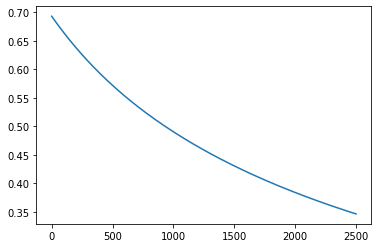

In [9]:
plt.plot(cost_history)
plt.show()

In [10]:
pred_y = pred(X_test,newB)
pred_y_Train = pred(X_train,newB)

In [11]:
print("Coefficients :",newB)

print("\nTRAIN Results :\n")
print(classification_report(y_train, pred_y_Train,labels=[1, 0]))
cm = confusion_matrix(y_train,pred_y_Train)
confution = pd.DataFrame(cm, index=['true 1','true 0'],columns=['pred 1','pred 0'])
display(confution)
print("\nTEST Results :\n")
print(classification_report(y_test, pred_y))
cm = confusion_matrix(y_test,pred_y)
confution = pd.DataFrame(cm, index=['true 1','true 0'],columns=['pred 1','pred 0'])
display(confution)

Coefficients : [ 0.16084726  0.42604134 -0.17244232  0.74957146  0.11909491]

TRAIN Results :

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        74
           0       1.00      1.00      1.00        38

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



,pred 1,pred 0
true 1,38,0
true 0,0,74



TEST Results :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        26

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



,pred 1,pred 0
true 1,12,0
true 0,0,26
